<a href="https://colab.research.google.com/github/Mitchell-hub53/WK-3-ASSIGNMENTT-AI-FOR-SOFTWARE-ENGINEERING-/blob/main/my_model_kerasipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 - 42s - 100ms/step - accuracy: 0.9184 - loss: 0.2697 - val_accuracy: 0.9778 - val_loss: 0.0698
Epoch 2/10
422/422 - 40s - 95ms/step - accuracy: 0.9742 - loss: 0.0851 - val_accuracy: 0.9873 - val_loss: 0.0436
Epoch 3/10
422/422 - 39s - 93ms/step - accuracy: 0.9819 - loss: 0.0609 - val_accuracy: 0.9888 - val_loss: 0.0374
Epoch 4/10
422/422 - 39s - 93ms/step - accuracy: 0.9847 - loss: 0.0485 - val_accuracy: 0.9887 - val_loss: 0.0386
Epoch 5/10
422/422 - 40s - 94ms/step - accuracy: 0.9875 - loss: 0.0427 - val_accuracy: 0.9915 - val_loss: 0.0321
Epoch 6/10
422/422 - 41s - 96ms/step - accuracy: 0.9887 - loss: 0.0359 - val_accuracy: 0.9907 - val_loss: 0.0372
Epoch 7/10
422/422 - 41s - 96ms/step - accuracy: 0.9908 - loss: 0.0308 - val_accuracy: 0.9915 - val_loss: 0.0309
Epoch 8/10
422/422 - 41s - 98ms/step - accuracy: 0.9916 - loss: 0.0276 - val_accuracy: 0.9913 - val_loss: 0.0284
Epoch 9/10
422/422 - 41s - 98ms/step - accuracy: 0.9918 - loss: 0.0244 - val_accuracy: 0.9912 -

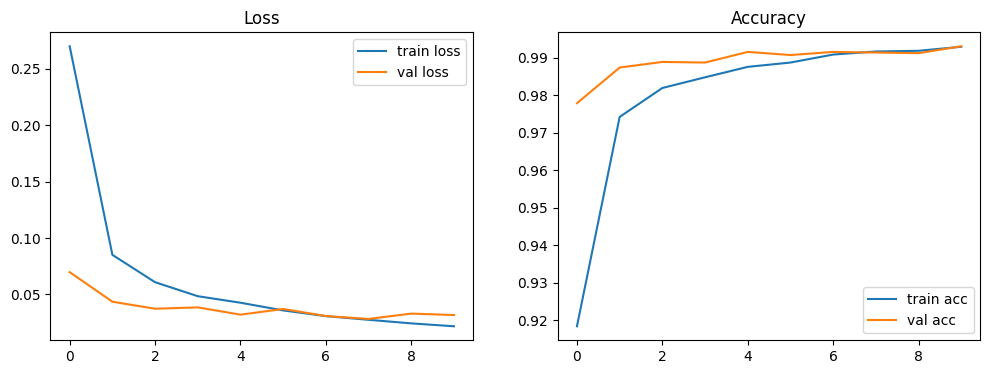

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


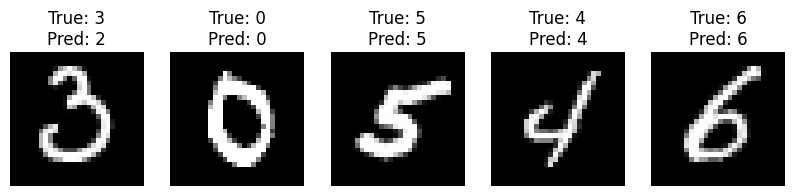

In [1]:
# 2B_mnist_cnn_tensorflow.ipynb
# Colab recommended: Runtime -> Change runtime type -> GPU

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# 1. Load MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Preprocess
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Expand dims to (batch, 28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat  = to_categorical(y_test, num_classes=10)

# 3. Model architecture (simple but effective)
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = build_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 4. Train (use validation split)
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=128, validation_split=0.1, verbose=2)

# 5. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# If accuracy < 0.95, you can increase epochs to 12-15 or augment data.

# 6. Plot training curves (screenshot)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.plot(history.history['loss'], label='train loss'); plt.plot(history.history['val_loss'], label='val loss'); plt.legend(); plt.title('Loss')
plt.subplot(1,2,2); plt.plot(history.history['accuracy'], label='train acc'); plt.plot(history.history['val_accuracy'], label='val acc'); plt.legend(); plt.title('Accuracy')
plt.show()

# 7. Visualize model predictions on 5 sample images (screenshot these)
import random
indices = random.sample(range(len(x_test)), 5)
preds = model.predict(x_test[indices])
pred_labels = np.argmax(preds, axis=1)

plt.figure(figsize=(10,4))
for i, idx in enumerate(indices):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[idx].squeeze(), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {pred_labels[i]}")
    plt.axis('off')
plt.show()

# 8. Save model (optional for deployment)
model.save('mnist_cnn.h5')
